#  f(x) = x^2 * sin(x) - optymalizacja

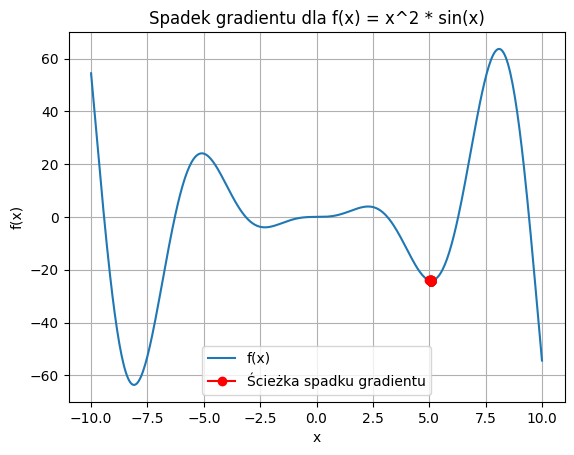

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcja i jej pochodna
def f(x):
    return x**2 * np.sin(x)

def grad_f(x):
    return 2*x*np.sin(x) + x**2*np.cos(x)

# Parametry
x = 5.0  # punkt startowy
learning_rate = 0.01
iterations = 100

# Śledzenie wyników
x_vals = [x]
f_vals = [f(x)]

# Optymalizacja
for i in range(iterations):
    x = x - learning_rate * grad_f(x)
    x_vals.append(x)
    f_vals.append(f(x))

# Wizualizacja
x_range = np.linspace(-10, 10, 400)
plt.plot(x_range, f(x_range), label="f(x)")
plt.plot(x_vals, f_vals, 'ro-', label="Ścieżka spadku gradientu")
plt.title("Spadek gradientu dla f(x) = x^2 * sin(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


# Sieć neuronowa na zbiór iris

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Wczytanie zbioru danych
iris = load_iris()
X = iris.data
y = iris.target

# Binarna klasyfikacja: tylko klasy 0 i 1
X = X[y != 2]
y = y[y != 2]

# Podział
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standaryzacja
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train).unsqueeze(1)
y_test = torch.FloatTensor(y_test).unsqueeze(1)

# Model
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layer(x)

model = SimpleNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Trening
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

# Ewaluacja
with torch.no_grad():
    y_pred = model(X_test)
    predicted = (y_pred > 0.5).float()
    accuracy = (predicted == y_test).float().mean()
    print(f"Accuracy: {accuracy.item():.4f}")


Accuracy: 1.0000


# Sieć konwoluncyjna na zbiorze MINST

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Przygotowanie danych
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# CNN model
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Trening
for epoch in range(3):  # dla szybkiego testu
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss:.3f}")

# Test
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Epoch 1, Loss: 182.827
Epoch 2, Loss: 51.075
Epoch 3, Loss: 35.710
Test Accuracy: 98.85%
